In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [29]:
data = pd.read_csv(r"C:\Users\DELL\Downloads\wineQuality.csv")  

In [30]:
data

,fixedacidity,volatileacidity,citricacid,residualsugar,chlorides,freesulfurdioxide,totalsulfurdioxide,density,pH,sulphates,alcohol,quality,Color
0,7.1,0.26,0.49,2.20,0.032,31.0,113.0,0.99030,3.37,0.42,12.9,92,White
1,9.1,0.27,0.45,10.60,0.035,28.0,124.0,0.99700,3.20,0.46,10.4,89,White
2,6.9,0.36,0.34,4.20,0.018,57.0,119.0,0.98980,3.28,0.36,12.7,88,White
3,7.4,0.24,0.36,2.00,0.031,27.0,139.0,0.99055,3.28,0.48,12.5,86,White
4,5.6,0.85,0.05,1.40,0.045,12.0,88.0,0.99240,3.56,0.82,12.9,85,Red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,7.6,1.58,0.00,2.10,0.137,5.0,9.0,0.99476,3.50,0.40,10.9,26,Red
6493,6.7,0.25,0.26,1.55,0.041,118.5,216.0,0.99490,3.55,0.63,9.4,26,White
6494,11.8,0.23,0.38,11.10,0.034,15.0,123.0,0.99970,2.93,0.55,9.7,26,White
6495,7.6,0.48,0.37,1.20,0.034,5.0,57.0,0.99256,3.05,0.54,10.4,25,White


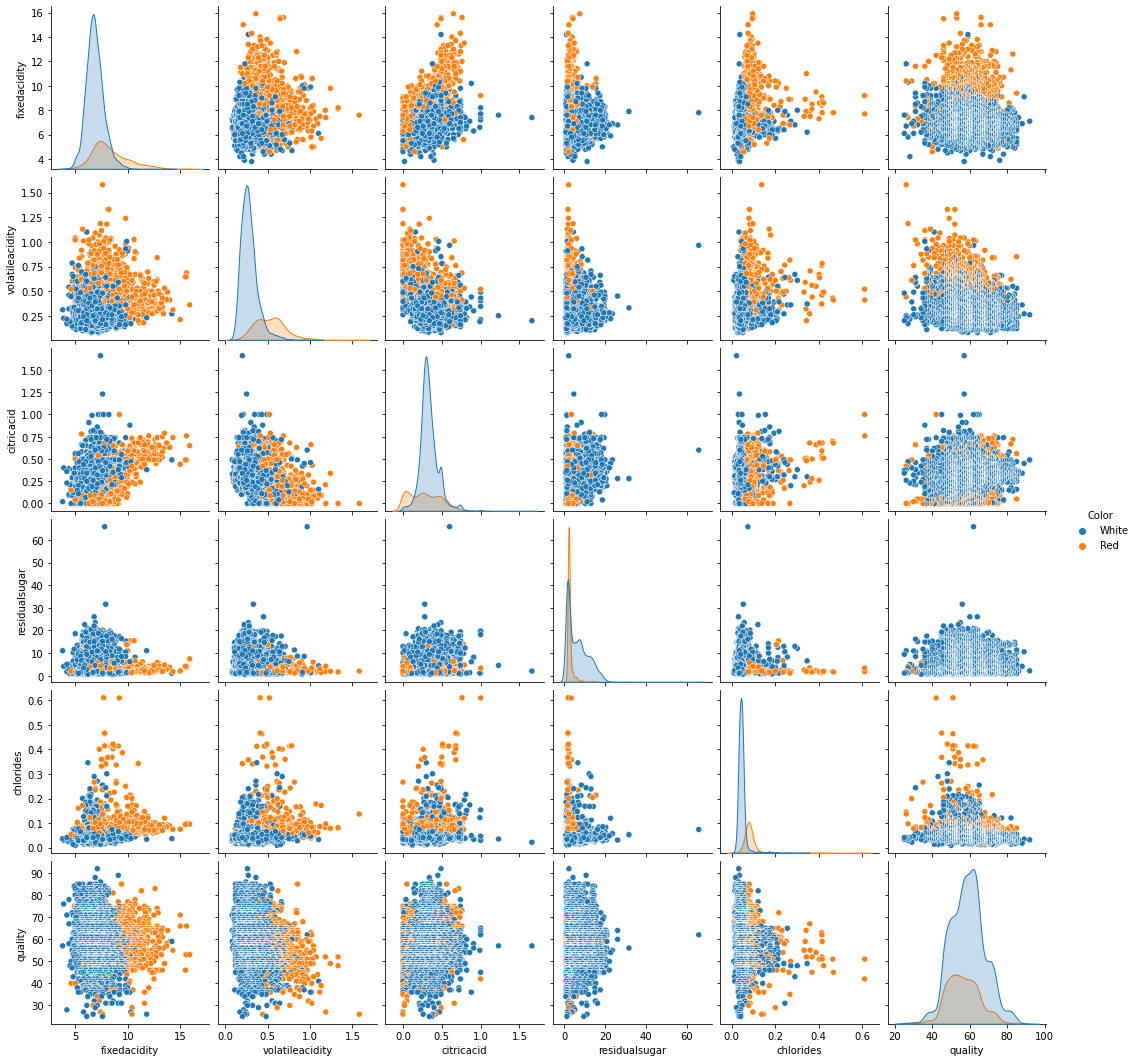

In [31]:
sns.pairplot(data, vars=['fixedacidity', 'volatileacidity', 'citricacid', 'residualsugar', 'chlorides', 'quality'], hue='Color')
plt.show()

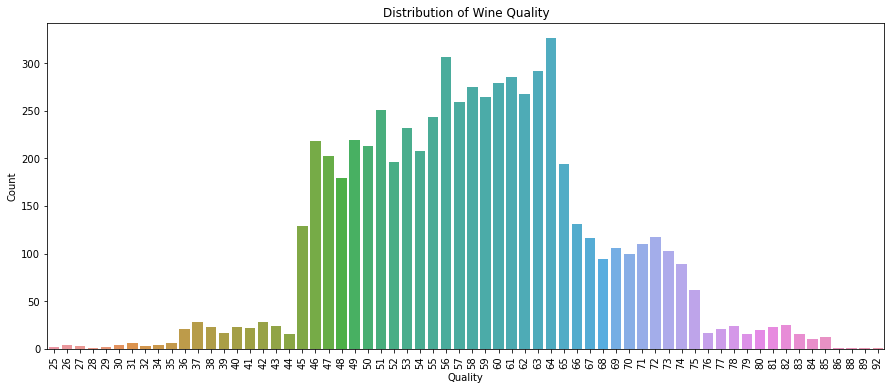

In [33]:
plt.figure(figsize=(15,6))
sns.countplot(x='quality', data=data)
plt.title('Distribution of Wine Quality')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

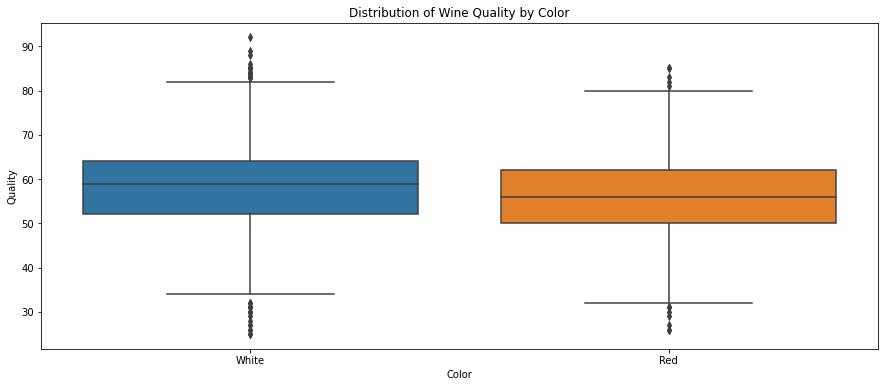

In [36]:
plt.figure(figsize=(15,6))
sns.boxplot(x='Color', y='quality', data=data)
plt.title('Distribution of Wine Quality by Color')
plt.xlabel('Color')
plt.ylabel('Quality')
plt.show()


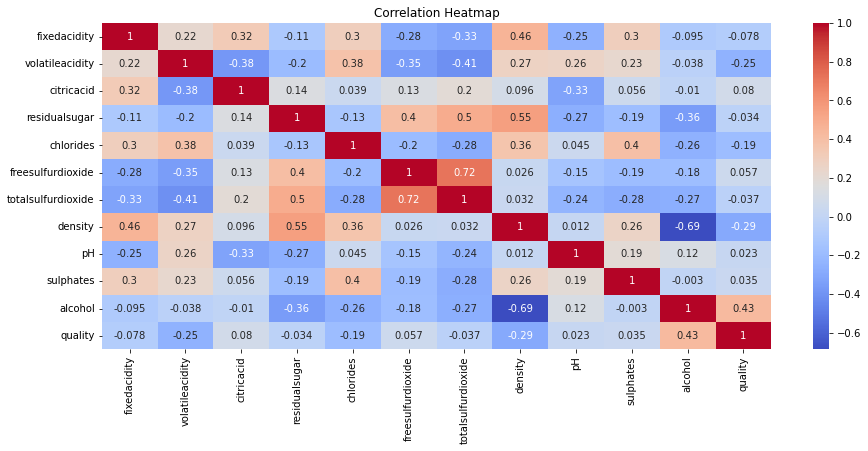

In [37]:
plt.figure(figsize=(15,6))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


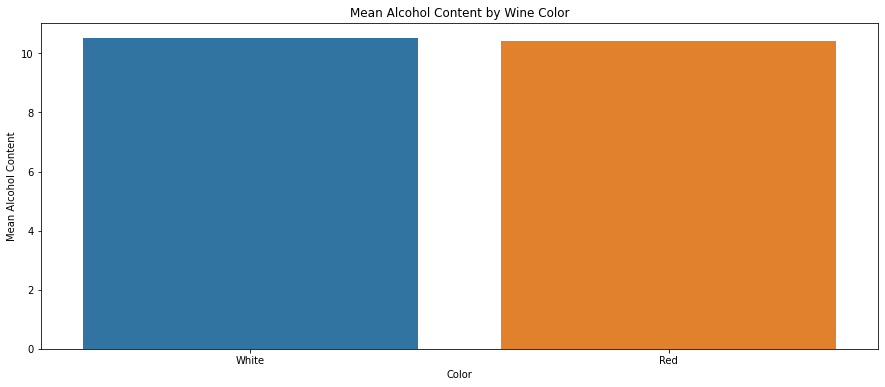

In [39]:
plt.figure(figsize=(15,6))
sns.barplot(x='Color', y='alcohol', data=data, ci=None)
plt.title('Mean Alcohol Content by Wine Color')
plt.xlabel('Color')
plt.ylabel('Mean Alcohol Content')
plt.show()


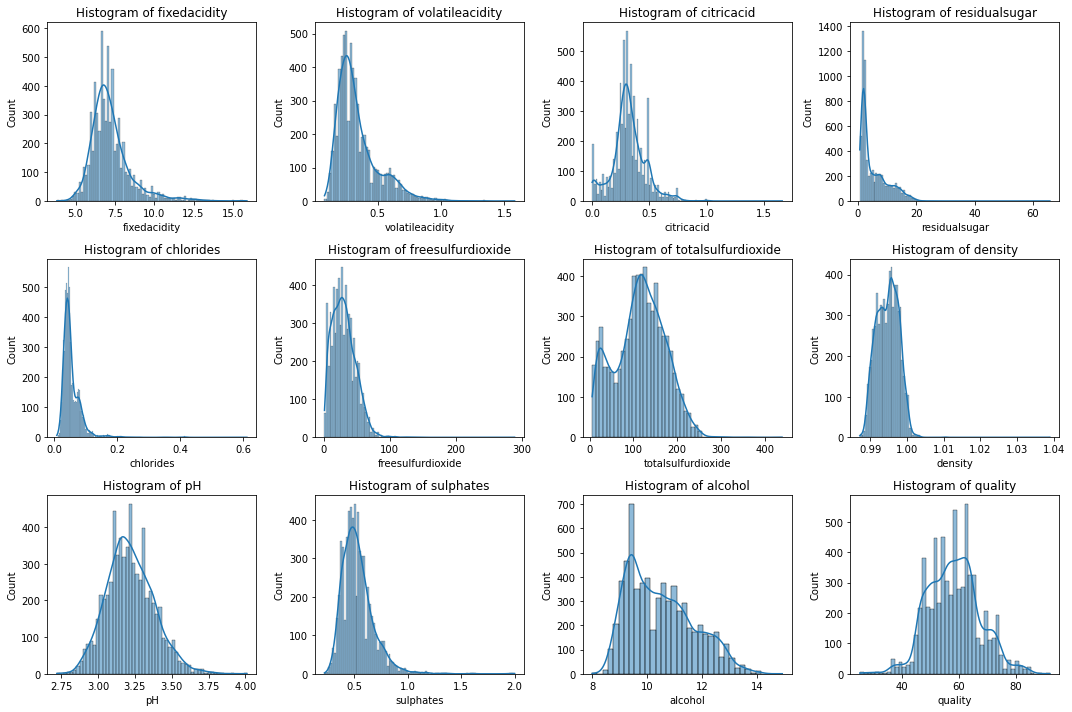

In [40]:
numerical_features = ['fixedacidity', 'volatileacidity', 'citricacid', 'residualsugar', 'chlorides', 'freesulfurdioxide', 'totalsulfurdioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']

fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 10))
for i, feature in enumerate(numerical_features):
    row, col = i // 4, i % 4
    sns.histplot(data[feature], ax=axes[row, col], kde=True)
    axes[row, col].set_title(f'Histogram of {feature}')
plt.tight_layout()
plt.show()


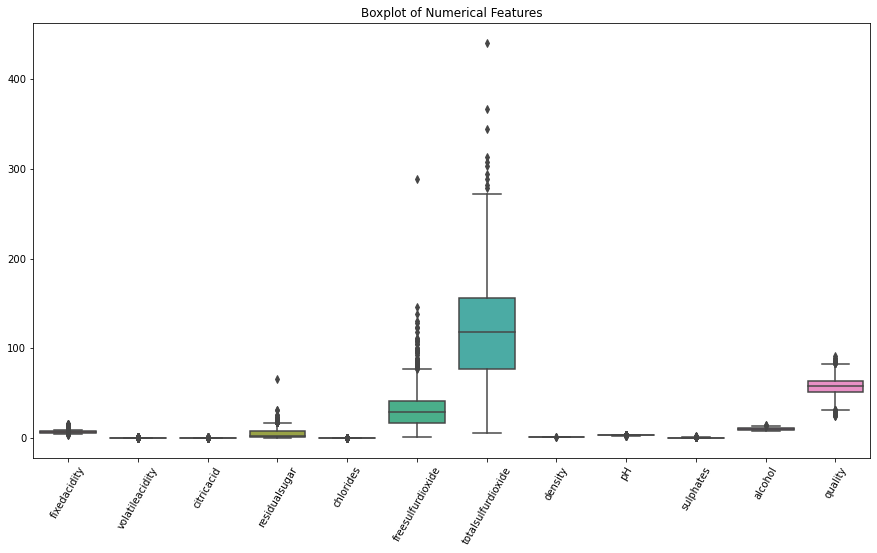

In [43]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=data[numerical_features])
plt.title('Boxplot of Numerical Features')
plt.xticks(rotation=60)
plt.show()


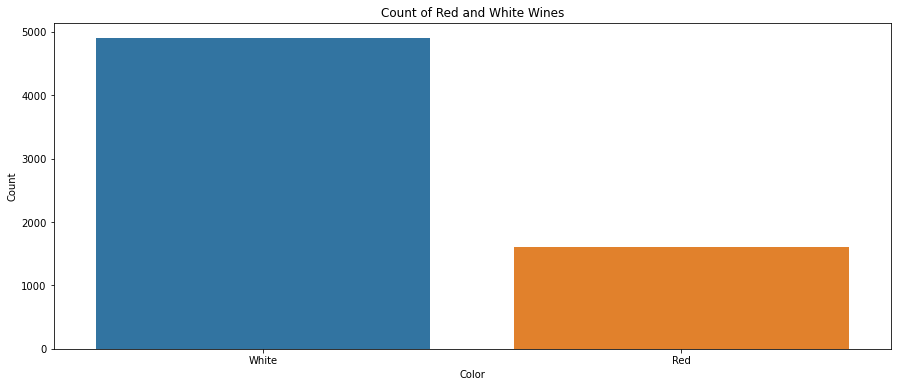

In [45]:
plt.figure(figsize=(15, 6))
sns.countplot(x='Color', data=data)
plt.title('Count of Red and White Wines')
plt.xlabel('Color')
plt.ylabel('Count')
plt.show()


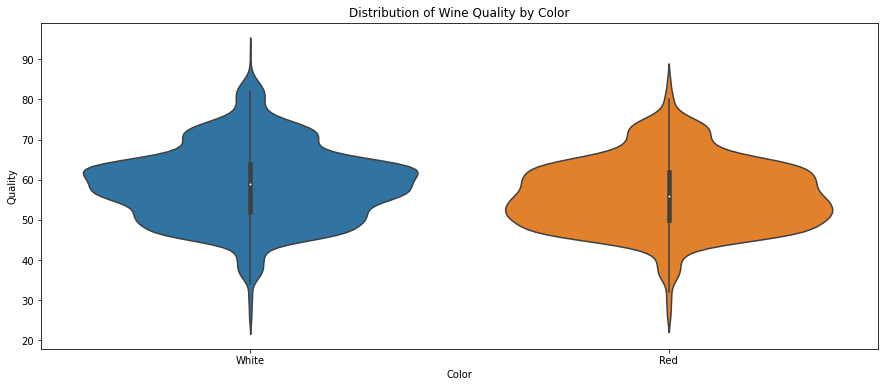

In [47]:
plt.figure(figsize=(15, 6))
sns.violinplot(x='Color', y='quality', data=data)
plt.title('Distribution of Wine Quality by Color')
plt.xlabel('Color')
plt.ylabel('Quality')
plt.show()


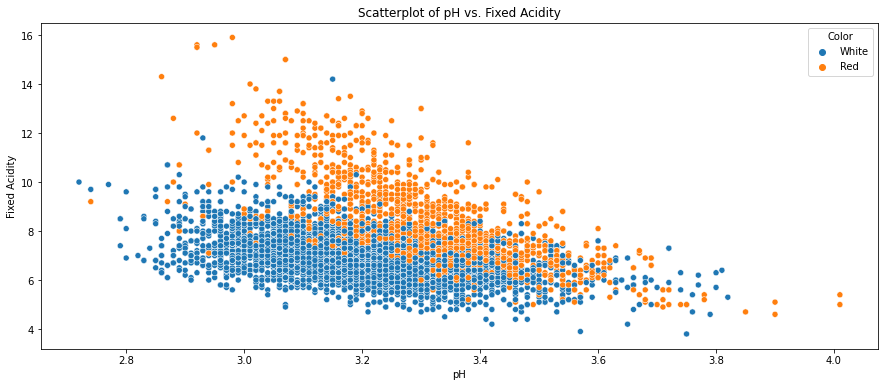

In [48]:
plt.figure(figsize=(15, 6))
sns.scatterplot(x='pH', y='fixedacidity', data=data, hue='Color')
plt.title('Scatterplot of pH vs. Fixed Acidity')
plt.xlabel('pH')
plt.ylabel('Fixed Acidity')
plt.show()


In [49]:
data.head()

,fixedacidity,volatileacidity,citricacid,residualsugar,chlorides,freesulfurdioxide,totalsulfurdioxide,density,pH,sulphates,alcohol,quality,Color
0,7.1,0.26,0.49,2.2,0.032,31.0,113.0,0.99030,3.37,0.42,12.9,92,White
1,9.1,0.27,0.45,10.6,0.035,28.0,124.0,0.99700,3.20,0.46,10.4,89,White
2,6.9,0.36,0.34,4.2,0.018,57.0,119.0,0.98980,3.28,0.36,12.7,88,White
3,7.4,0.24,0.36,2.0,0.031,27.0,139.0,0.99055,3.28,0.48,12.5,86,White
4,5.6,0.85,0.05,1.4,0.045,12.0,88.0,0.99240,3.56,0.82,12.9,85,Red


In [50]:
data = pd.get_dummies(data, columns=['Color'], drop_first=True)
data.head()

,fixedacidity,volatileacidity,citricacid,residualsugar,chlorides,freesulfurdioxide,totalsulfurdioxide,density,pH,sulphates,alcohol,quality,Color_White
0,7.1,0.26,0.49,2.2,0.032,31.0,113.0,0.99030,3.37,0.42,12.9,92,1
1,9.1,0.27,0.45,10.6,0.035,28.0,124.0,0.99700,3.20,0.46,10.4,89,1
2,6.9,0.36,0.34,4.2,0.018,57.0,119.0,0.98980,3.28,0.36,12.7,88,1
3,7.4,0.24,0.36,2.0,0.031,27.0,139.0,0.99055,3.28,0.48,12.5,86,1
4,5.6,0.85,0.05,1.4,0.045,12.0,88.0,0.99240,3.56,0.82,12.9,85,0


In [57]:
# Split the dataset into training and testing sets
X = data.drop(columns=['quality'])
y = data['quality']

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [59]:
#Create and train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [60]:
#Evaluate the model's performance
y_pred = model.predict(X_test)

In [61]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 63.33559342127721
R-squared: 0.2611966480823521


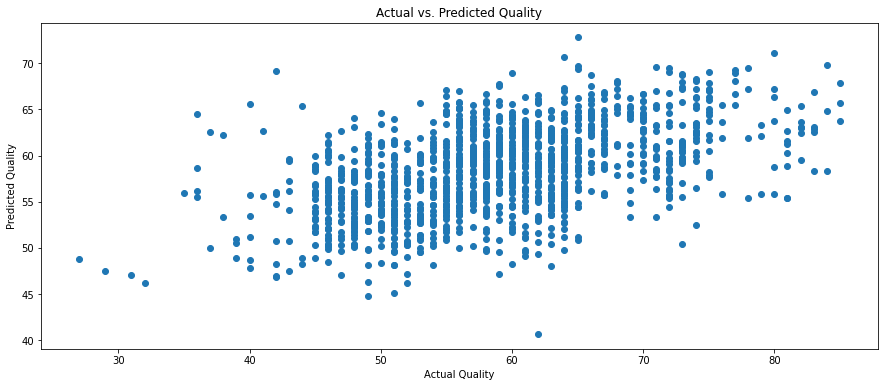

In [71]:
#Visualize the regression line
plt.figure(figsize=(15, 6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Quality")
plt.ylabel("Predicted Quality")
plt.title("Actual vs. Predicted Quality")
plt.show()

# BHARAT INTERN

# THANK YOU